In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('behavior.csv')
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['hour'].astype(int)
data['datetime'] = data['time'] + pd.to_timedelta(data['hour'], unit='h')

In [3]:
data['date'] = data['datetime'].dt.date

In [4]:
user_per_day = data.groupby('date')['user_id'].unique()
user_per_day

date
2024-01-08    [3818035, 4044659, 3846307, 4225075, 3668163, ...
2024-01-09    [3600547, 3764675, 3951411, 3532947, 3769059, ...
2024-01-10    [3965299, 4175331, 4236019, 4039539, 4054163, ...
2024-01-11    [3835891, 4156083, 3940339, 4159203, 3965811, ...
2024-01-12    [3872915, 4211283, 3572003, 3566819, 3721155, ...
2024-01-13    [4164835, 4037299, 3527747, 3746387, 3605075, ...
2024-01-14    [3789091, 3450947, 3857267, 4158531, 3539507, ...
2024-01-15    [3596931, 4149011, 3879427, 4213795, 4230291, ...
2024-01-16    [3566803, 3751843, 3993731, 3996403, 3990499, ...
2024-01-17    [4240899, 3621875, 3780579, 3735859, 3981507, ...
2024-01-18    [3567971, 4060195, 3898451, 3742419, 3674691, ...
Name: user_id, dtype: object

In [5]:
dates = sorted(user_per_day.index)
dates

[datetime.date(2024, 1, 8),
 datetime.date(2024, 1, 9),
 datetime.date(2024, 1, 10),
 datetime.date(2024, 1, 11),
 datetime.date(2024, 1, 12),
 datetime.date(2024, 1, 13),
 datetime.date(2024, 1, 14),
 datetime.date(2024, 1, 15),
 datetime.date(2024, 1, 16),
 datetime.date(2024, 1, 17),
 datetime.date(2024, 1, 18)]

In [19]:
retention = pd.DataFrame(index=dates, columns=dates)
retention

,2024-01-08,2024-01-09,2024-01-10,2024-01-11,2024-01-12,2024-01-13,2024-01-14,2024-01-15,2024-01-16,2024-01-17,2024-01-18
2024-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
for i, date in enumerate(dates):
    initial_users = set(user_per_day[date])
    for j in range(i, len(dates)):
        next_date = dates[j]
        returning_users = set(user_per_day[next_date])
        retention_rate = len(returning_users & initial_users) / len(initial_users) if len(initial_users) > 0 else 0
        retention.at[date, next_date] = retention_rate * 100
        
retention = retention.astype(float)

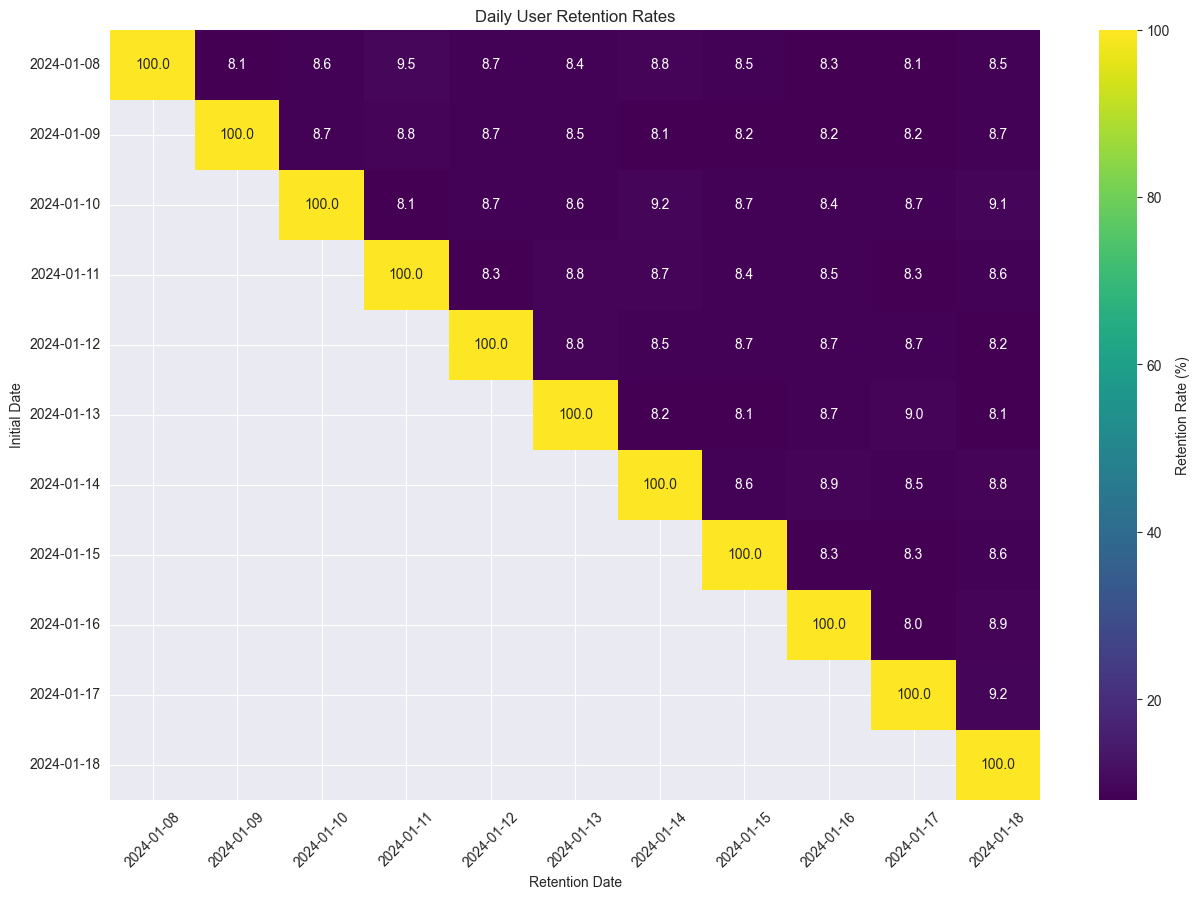

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(retention, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Retention Rate (%)'})
plt.title('Daily User Retention Rates')
plt.xlabel('Retention Date')
plt.ylabel('Initial Date')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [25]:
for i, date in enumerate(dates):
    initial_users = set(user_per_day[date])
    for j in range(i, len(dates)):
        next_date = dates[j]
        returning_users = set(user_per_day[next_date])
        retention.at[date, next_date] = len(returning_users & initial_users)
        
        
retention = retention.astype(float)

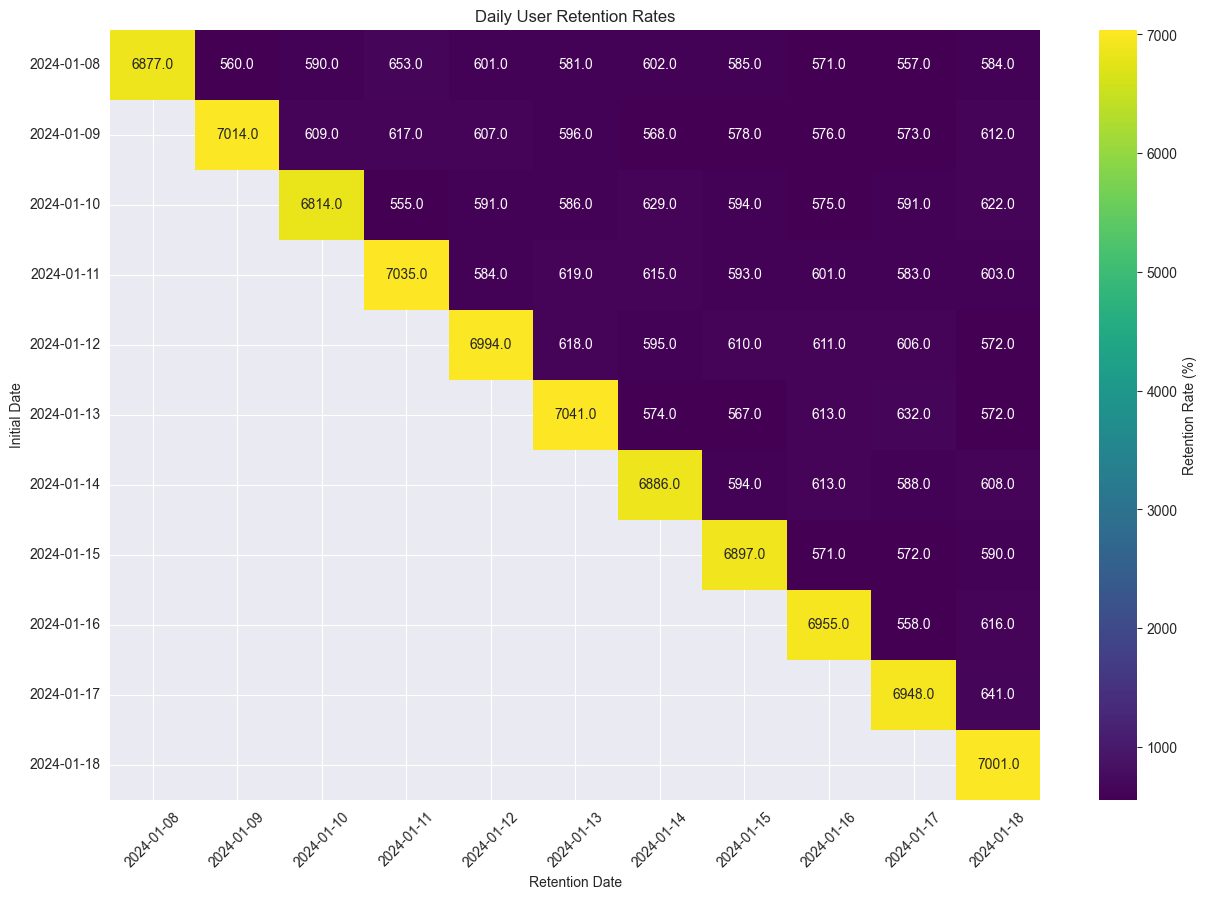

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(retention, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Retention Rate (%)'})
plt.title('Daily User Retention Rates')
plt.xlabel('Retention Date')
plt.ylabel('Initial Date')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()